In [315]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [316]:
df = pd.DataFrame()

In [317]:
df['X1']=[1,2,3,4,5,6,6,7,9,9]
df['X2']=[5,3,6,8,1,9,5,8,9,2]
df['label']=[1,1,0,1,0,1,0,1,0,0]

In [318]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

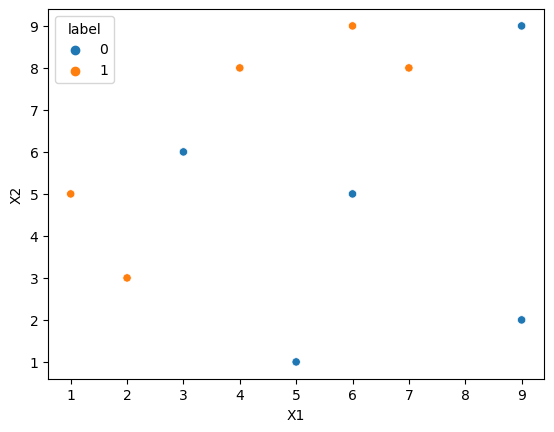

In [319]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [320]:
df['weight']=1/df.shape[0]

In [321]:
df

,X1,X2,label,weight
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [322]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(max_depth=1)

In [323]:
x=df.iloc[:,0:2].values
y=df.iloc[:,2].values

In [324]:
#step 2 : Train first model
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

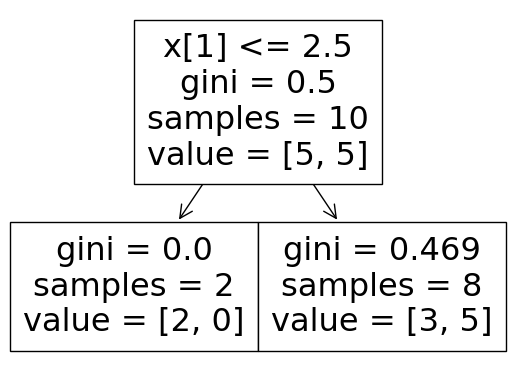

In [325]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

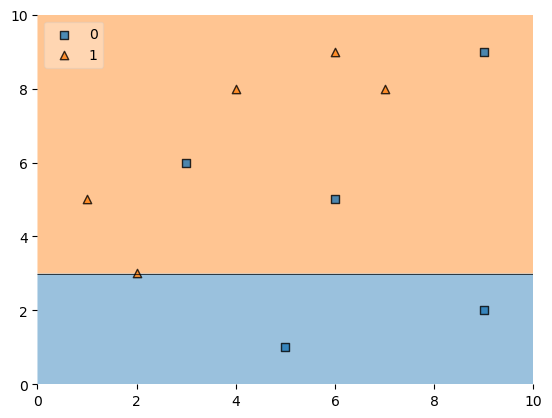

In [326]:
plot_decision_regions(x,y,clf=dt1,legend=2)

In [327]:
df['y_pred']=dt1.predict(x)

In [328]:
df

,X1,X2,label,weight,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [329]:
def find_error(df):
    return 1 - np.sum(df.loc[df["label"] == df["y_pred"], 'weight'])


In [408]:
#step3 : calculate model weight (alpha)
def calculate_model_weight(error):
    if(error==0):
        return 0
    return 0.5*np.log((1-error)/error)
alpha1 = calculate_model_weight(error=find_error(df))

In [331]:
#step 4 : update weights
def update_row_weights(row,alpha=0.423):
    if row['label']==row['y_pred']:
        return row['weight']*np.exp(-alpha)
    else:
        return row["weight"]*np.exp(alpha)

In [332]:
df['updated_weights']=df.apply(update_row_weights,axis=1)

In [333]:
df['normalised_weights']=df['updated_weights']/np.sum(df['updated_weights'])

In [334]:
df

,X1,X2,label,weight,y_pred,updated_weights,normalised_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [335]:
df

,X1,X2,label,weight,y_pred,updated_weights,normalised_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [336]:
df['cumsum_upper']=np.cumsum(df['normalised_weights'])

In [337]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalised_weights']

In [338]:
df[['X1','X2','label','weight','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weight,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [339]:
def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper']>a and a>row['cumsum_lower']:
                indices.append(index)
    return indices

In [340]:
index_values = create_new_dataset(df)

In [341]:
index_values

[0, 3, 6, 4, 9, 6, 7, 9, 8, 9]

In [342]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [343]:
second_df

,X1,X2,label,weight
0,1,5,1,0.1
3,4,8,1,0.1
6,6,5,0,0.1
4,5,1,0,0.1
9,9,2,0,0.1
6,6,5,0,0.1
7,7,8,1,0.1
9,9,2,0,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [344]:
dt2  = DecisionTreeClassifier(max_depth=1)

In [345]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [346]:
dt2.fit(X, y)

DecisionTreeClassifier(max_depth=1)

In [347]:
second_df['y_pred'] = dt2.predict(X)

In [348]:
second_df

,X1,X2,label,weight,y_pred
0,1,5,1,0.1,1
3,4,8,1,0.1,1
6,6,5,0,0.1,0
4,5,1,0,0.1,0
9,9,2,0,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
9,9,2,0,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [349]:
alpha2 = calculate_model_weight(error=find_error(second_df))

In [350]:
alpha2

1.0986122886681098

In [351]:

def update_row_weights(row,alpha=0.693):
    if row['label']==row['y_pred']:
        return row['weight']*np.exp(-alpha)
    else:
        return row["weight"]*np.exp(alpha)

In [352]:
second_df['updated_weights']=second_df.apply(update_row_weights,axis=1)

In [353]:
second_df['normalised_weight'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [354]:
second_df

,X1,X2,label,weight,y_pred,updated_weights,normalised_weight
0,1,5,1,0.1,1,0.050007,0.07693
3,4,8,1,0.1,1,0.050007,0.07693
6,6,5,0,0.1,0,0.050007,0.07693
4,5,1,0,0.1,0,0.050007,0.07693
9,9,2,0,0.1,0,0.050007,0.07693
6,6,5,0,0.1,0,0.050007,0.07693
7,7,8,1,0.1,0,0.199971,0.30763
9,9,2,0,0.1,0,0.050007,0.07693
8,9,9,0,0.1,0,0.050007,0.07693
9,9,2,0,0.1,0,0.050007,0.07693


In [355]:
second_df['cumsum_upper'] = np.cumsum(second_df["normalised_weight"])

In [356]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalised_weight']

In [357]:
second_df

,X1,X2,label,weight,y_pred,updated_weights,normalised_weight,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.050007,0.07693,0.07693,0.00000
3,4,8,1,0.1,1,0.050007,0.07693,0.15386,0.07693
6,6,5,0,0.1,0,0.050007,0.07693,0.23079,0.15386
4,5,1,0,0.1,0,0.050007,0.07693,0.30772,0.23079
9,9,2,0,0.1,0,0.050007,0.07693,0.38465,0.30772
6,6,5,0,0.1,0,0.050007,0.07693,0.46158,0.38465
7,7,8,1,0.1,0,0.199971,0.30763,0.76921,0.46158
9,9,2,0,0.1,0,0.050007,0.07693,0.84614,0.76921
8,9,9,0,0.1,0,0.050007,0.07693,0.92307,0.84614
9,9,2,0,0.1,0,0.050007,0.07693,1.00000,0.92307


In [358]:
second_df[['X1','X2','label','weight','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weight,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.050007,0.00000,0.07693
3,4,8,1,0.1,1,0.050007,0.07693,0.15386
6,6,5,0,0.1,0,0.050007,0.15386,0.23079
4,5,1,0,0.1,0,0.050007,0.23079,0.30772
9,9,2,0,0.1,0,0.050007,0.30772,0.38465
6,6,5,0,0.1,0,0.050007,0.38465,0.46158
7,7,8,1,0.1,0,0.199971,0.46158,0.76921
9,9,2,0,0.1,0,0.050007,0.76921,0.84614
8,9,9,0,0.1,0,0.050007,0.84614,0.92307
9,9,2,0,0.1,0,0.050007,0.92307,1.00000


In [359]:
index_values = create_new_dataset(second_df)

In [360]:
index_values

[6, 3, 6, 9, 9, 9, 9, 9, 7, 0]

In [361]:
c = second_df.iloc[index_values,[0,1,2,3]]

In [402]:
c

,X1,X2,label,weight,y_pred
7,7,8,1,0.1,1
4,5,1,0,0.1,0
7,7,8,1,0.1,1
9,9,2,0,0.1,0
9,9,2,0,0.1,0
9,9,2,0,0.1,0
9,9,2,0,0.1,0
9,9,2,0,0.1,0
9,9,2,0,0.1,0
0,1,5,1,0.1,1


In [401]:
dt3 = DecisionTreeClassifier(max_depth=1)

In [403]:
X = c.iloc[:,0:2].values
y = c.iloc[:,2].values


In [404]:
dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [405]:
c['y_pred'] = dt3.predict(X)


In [409]:
alpha3 = calculate_model_weight(error=find_error(c))

<Axes: >

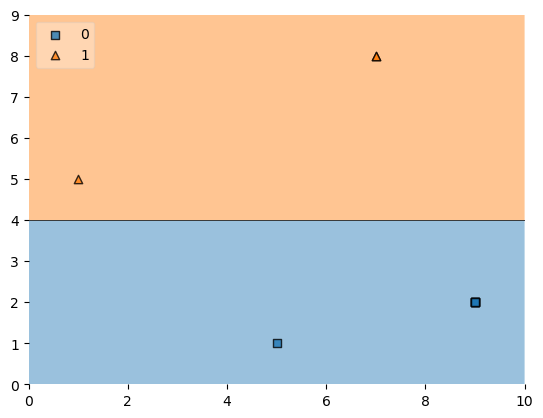

In [407]:
plot_decision_regions(X,y,clf=dt3,legend=2)

[Text(0.5, 0.75, 'x[1] <= 3.5\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

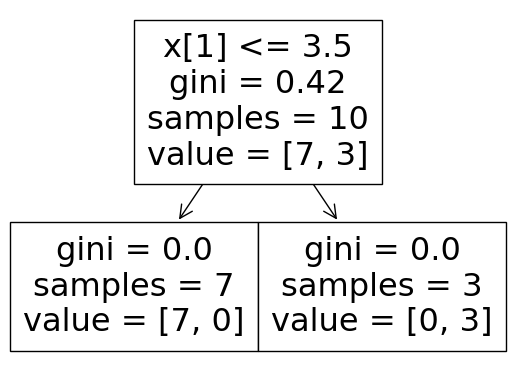

In [369]:
plot_tree(dt3)

In [421]:
query = np.array([9,2]).reshape(1,2)

In [1]:
ans = (alpha1*dt1.predict(query)[0])+(alpha2*dt2.predict(query)[0])+(alpha3*dt3.predict(query)[0])
ans

NameError: name 'alpha1' is not defined

In [2]:
np.sign(ans)

<IPython.core.display.Javascript object>

NameError: name 'ans' is not defined